In [50]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from matplotlib import ticker



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
sol = Table.read('Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

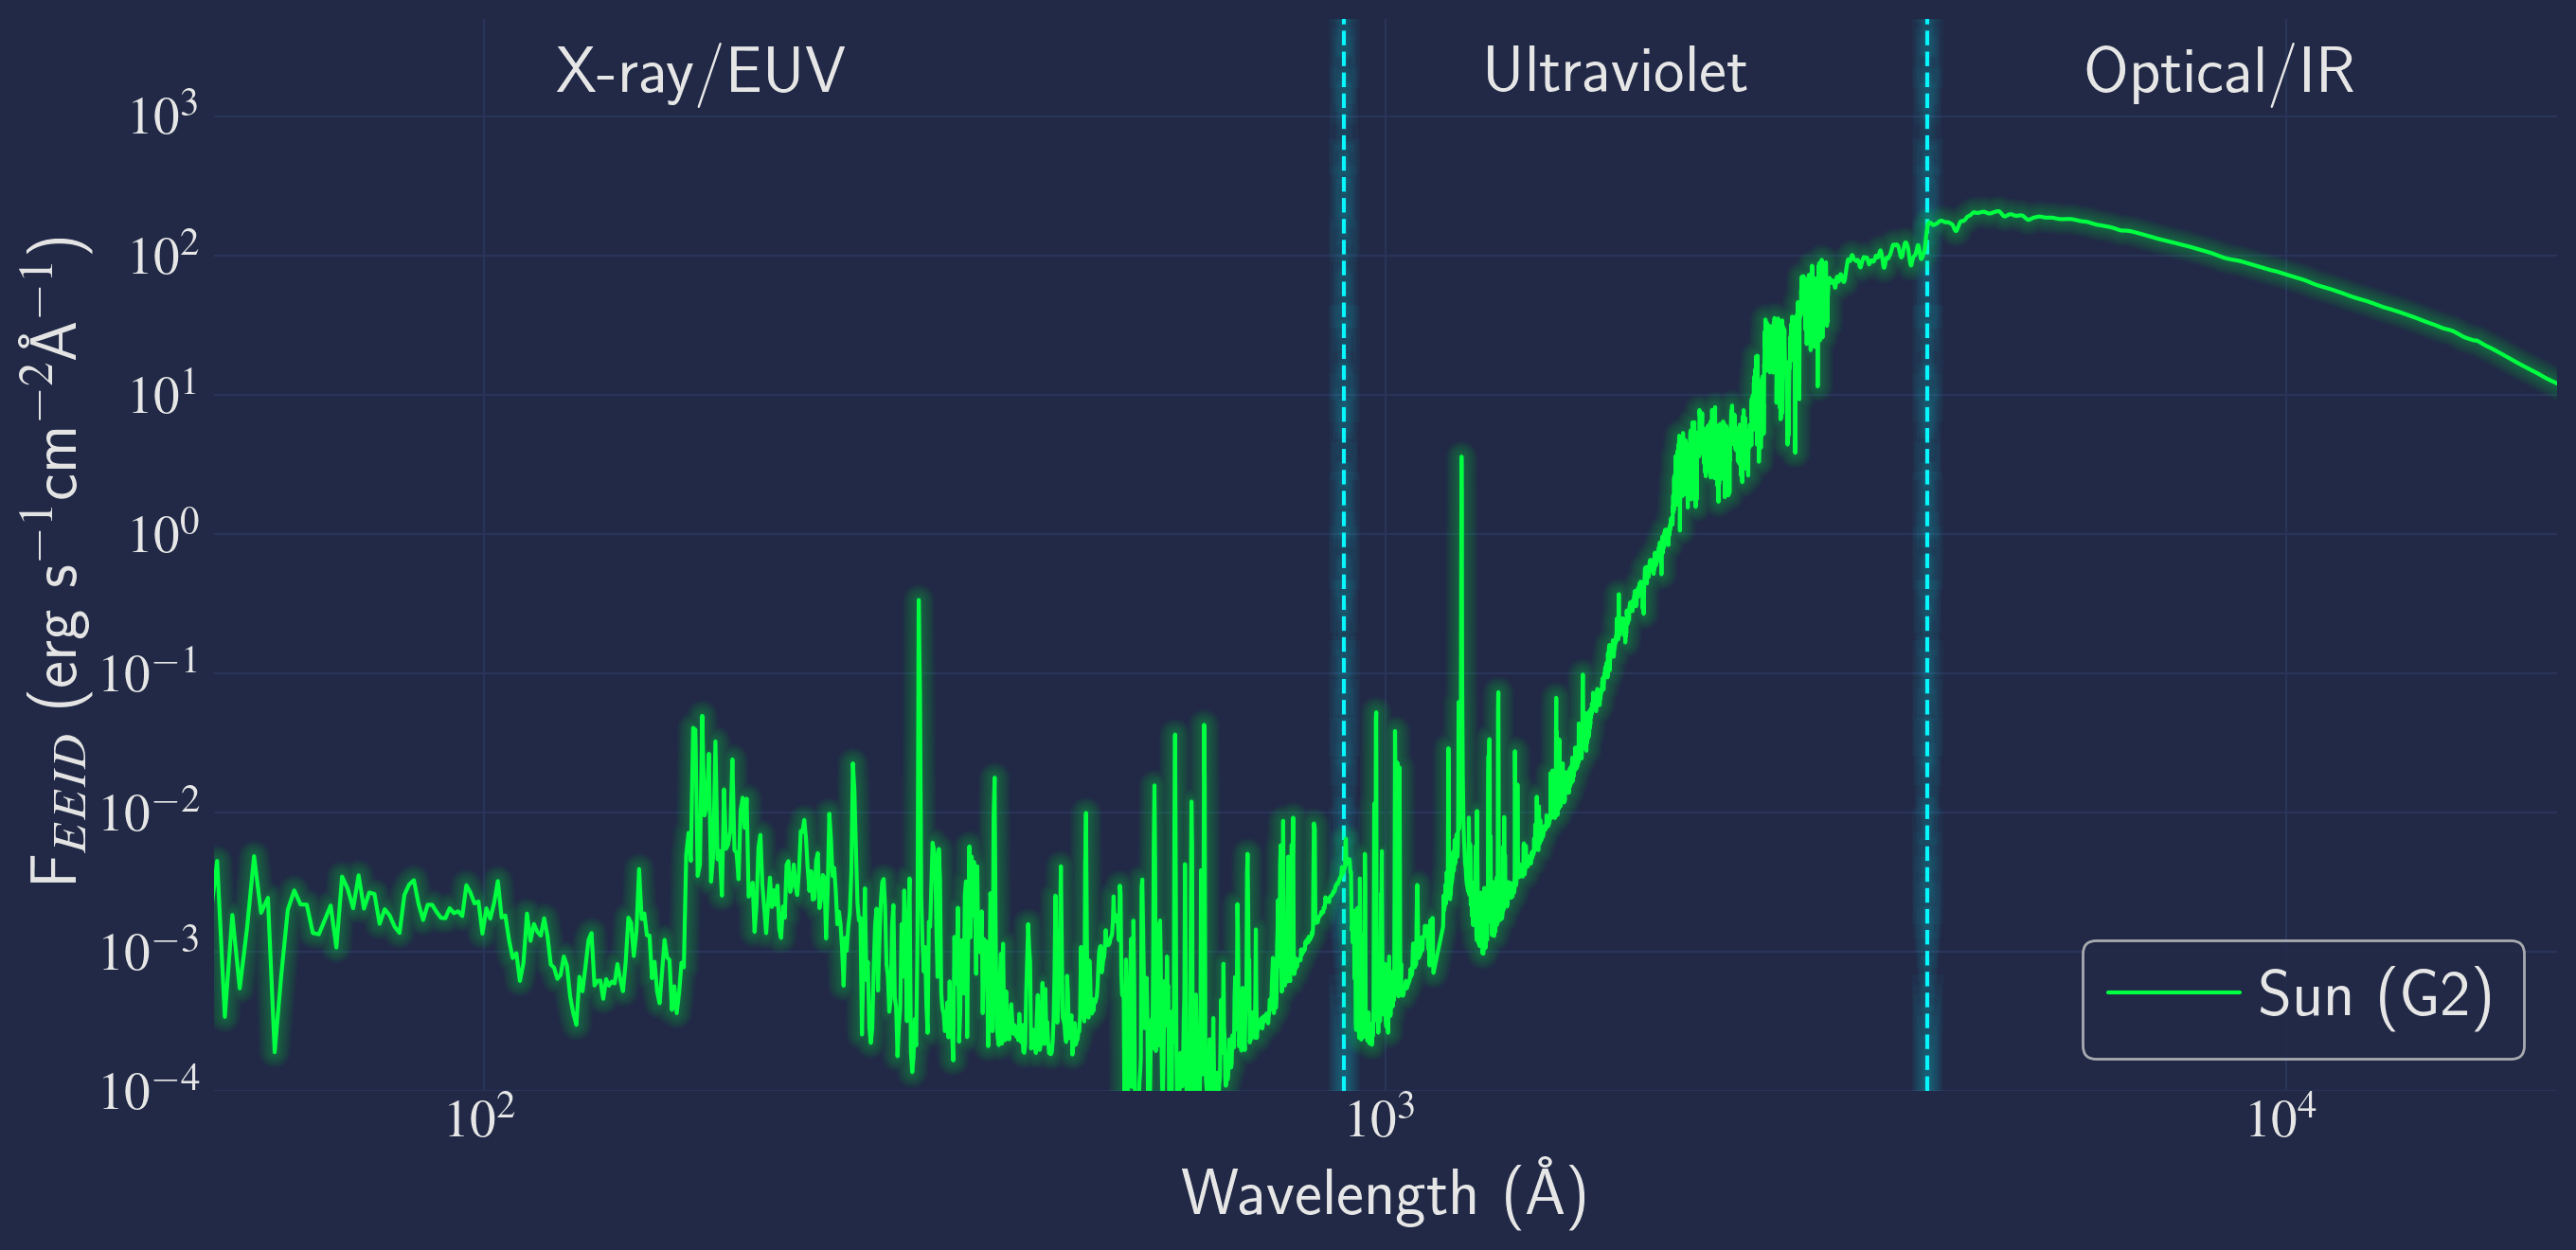

In [3]:
import mplcyberpunk
plt.style.use("cyberpunk")


# r_t1 = 0.117*u.Rsun
# r_832 = 0.45 *u.Rsun
# t_t1= 2560*u.K
# t_832 = 3472*u.K
# t_sun = 5777*u.K
# d_sun = (1*u.au).to(u.pc)
# d_832= 4.964350*u.pc
# # bb_scale = (u.Rsun**2 * t_sun**4)/(r_t1**2 * t_t1**4)*(d_t1/d_sun)**2
# bb_scale = (u.Rsun**2 * t_sun**4)/(r_832**2 * t_832**4)*(d_832/d_sun)**2
# print(bb_scale)

plt.figure(figsize=(14, 7))


plt.plot(sw, sf, c='C3', label = 'Sun (G2)', zorder=10)
# plt.plot(wgj, fgj*bb_scale, c='C4', label = 'GJ832 (M3)', zorder=12)
plt.xlim(50.1, 20000)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 5e3)

plt.axvline(900, ls='--')
plt.axvline(4000, ls='--')


# plt.fill_between([0,900],0,10000, facecolor='b',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# plt.fill_between([900,4000],0,10000, facecolor='g', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))
# 
# plt.fill_between([4000,60000],0,10000, facecolor='r',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3
# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
plt.annotate('Optical/IR' ,(6000, label_y), size=25)

plt.legend(fontsize=25, loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()

plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.tight_layout()
plt.savefig('plots/just_sun_cp.png', dpi=150)
# plt.savefig('plots/gj832_sun_cp.png', dpi=150)

In [4]:
hdspec = fits.getdata('draft_hlsp/hd120411/hlsp_muscles_multi_multi_hd-120411_broadband_v1_adapt-const-res-sed.fits', 1)
hw, hf = hdspec['WAVELENGTH'], hdspec['FLUX']

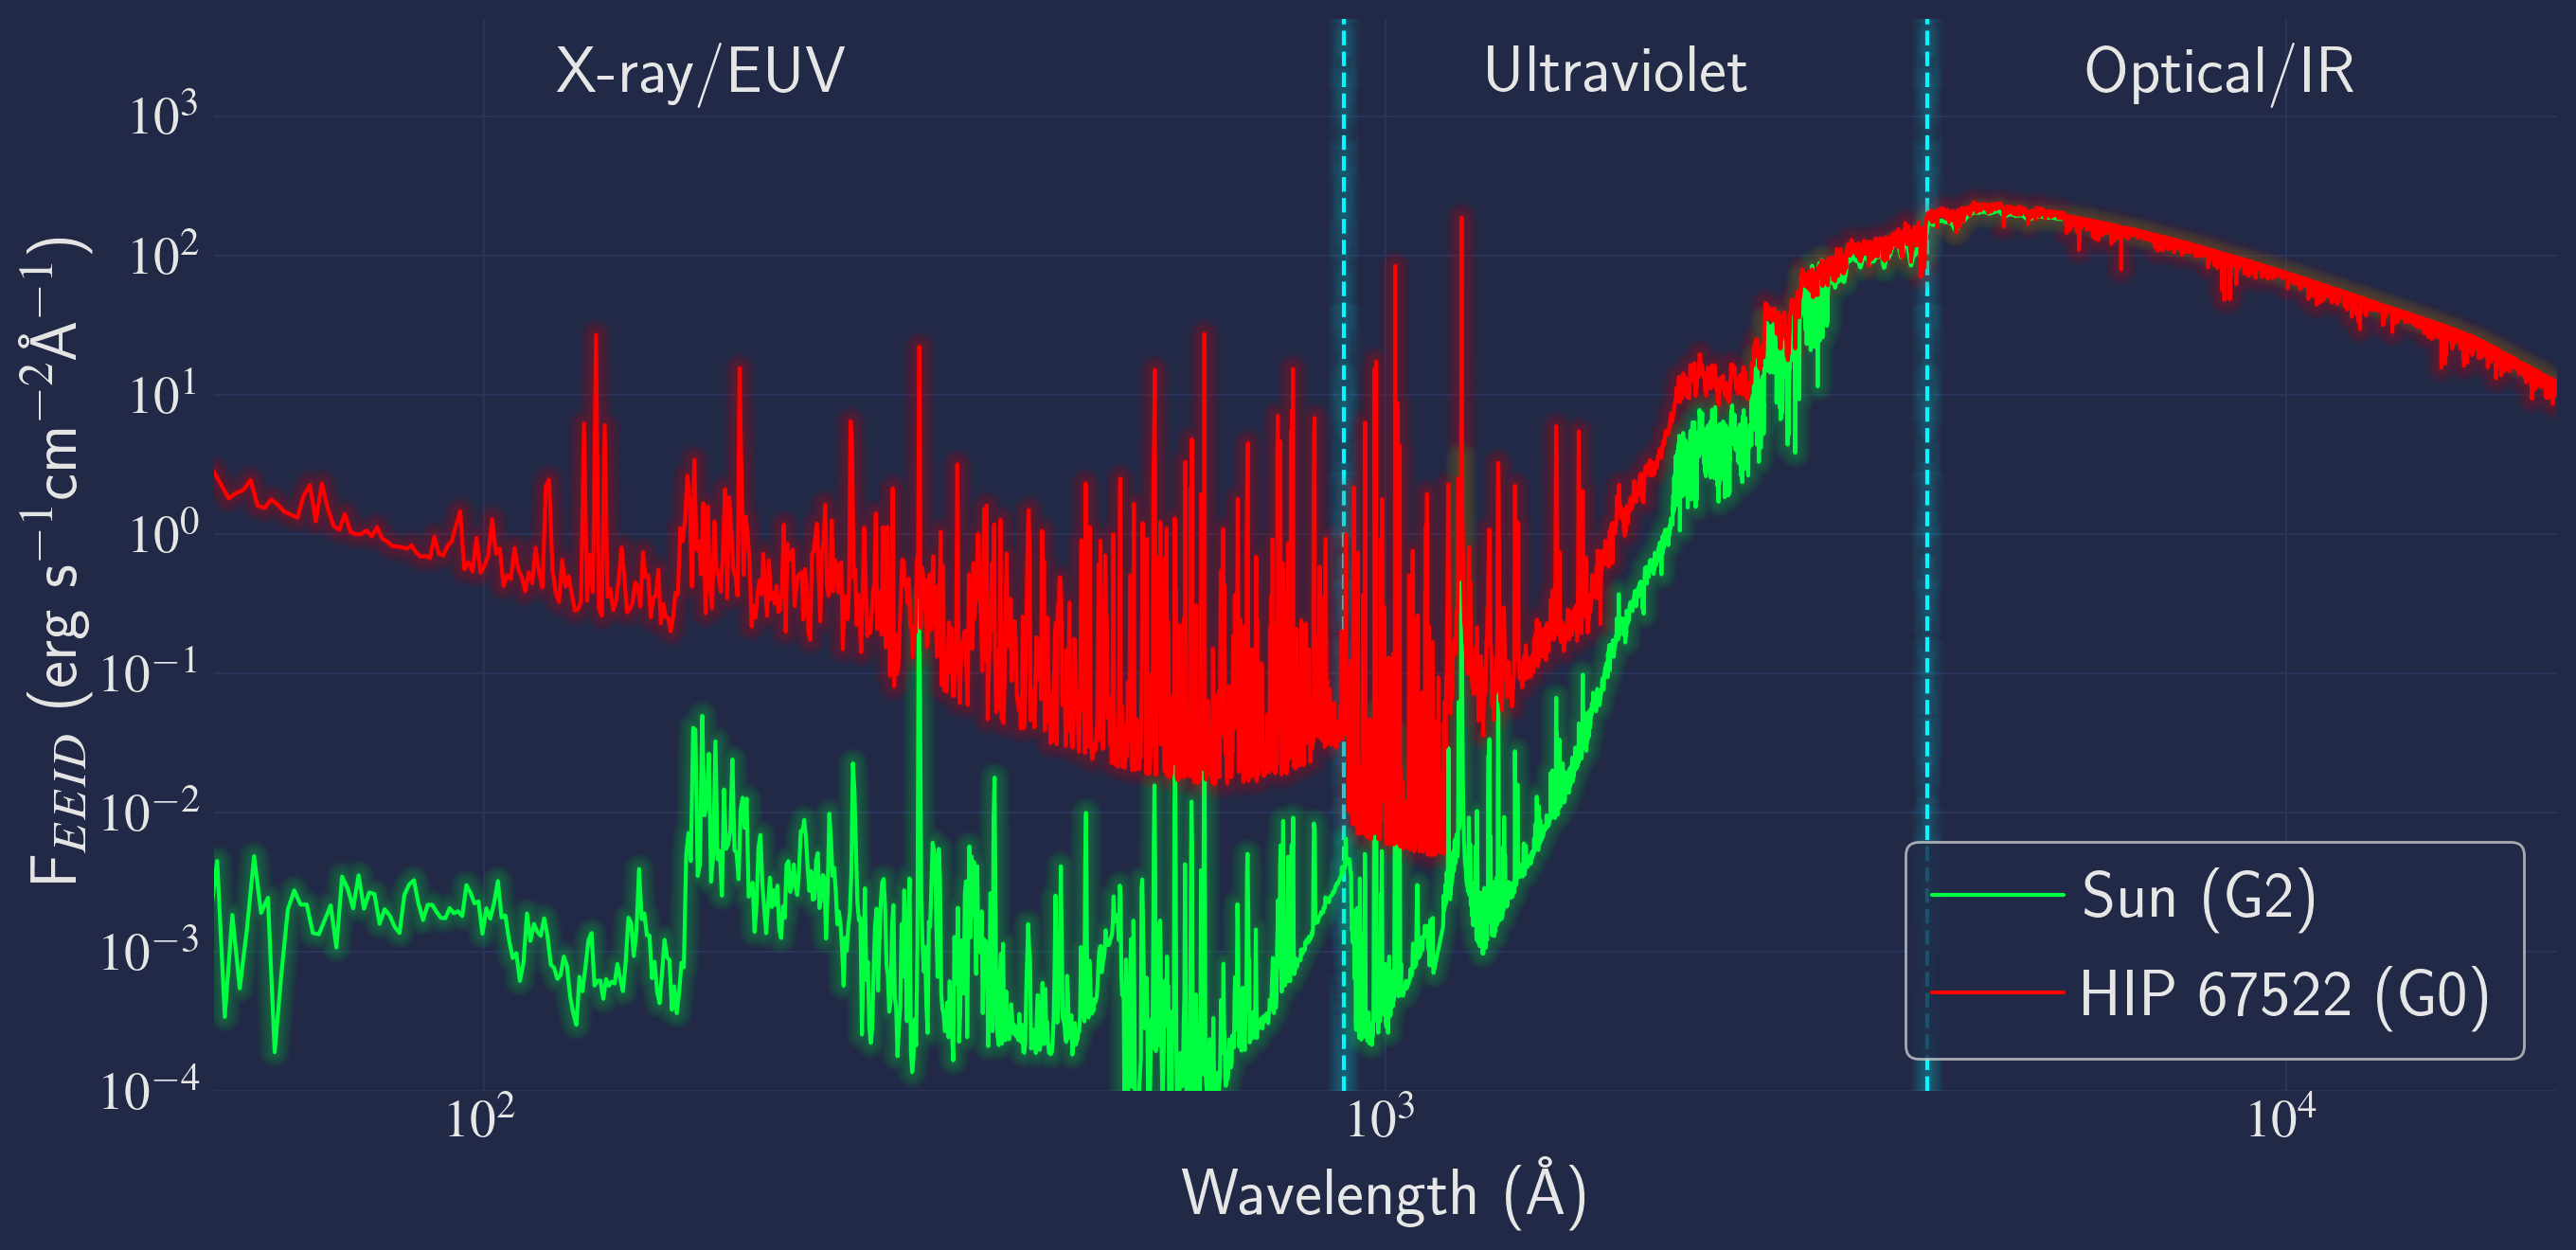

In [5]:
import mplcyberpunk
plt.style.use("cyberpunk")


d_star = 124.73*u.pc
t_star = 5675*u.K
r_star = 1.38*u.Rsun
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)

bb_scale = (u.Rsun**2 * t_sun**4)/(r_star**2 * t_star**4)*(d_star/d_sun)**2
# print(bb_scale)

plt.figure(figsize=(14, 7))


plt.plot(sw, sf, c='C3', label = 'Sun (G2)', zorder=10)
plt.plot(hw, hf*bb_scale, c='C4', label = 'HIP 67522 (G0)', zorder=12)
plt.xlim(50.1, 20000)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 5e3)

plt.axvline(900, ls='--')
plt.axvline(4000, ls='--')


# plt.fill_between([0,900],0,10000, facecolor='b',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# plt.fill_between([900,4000],0,10000, facecolor='g', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))
# 
# plt.fill_between([4000,60000],0,10000, facecolor='r',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3
# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
plt.annotate('Optical/IR' ,(6000, label_y), size=25)

plt.legend(fontsize=25, loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()

plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.tight_layout()
# plt.savefig('plots/just_sun_cp.png', dpi=150)
plt.savefig('plots/hip67522_sun_cp.png', dpi=150)

In [6]:
gjspec = fits.getdata('draft_hlsp/gj_367/hlsp_muscles_multi_multi_gj_367_broadband_v1_adapt-const-res-sed.fits', 1)
gjw, gjf = gjspec['WAVELENGTH'], gjspec['FLUX']

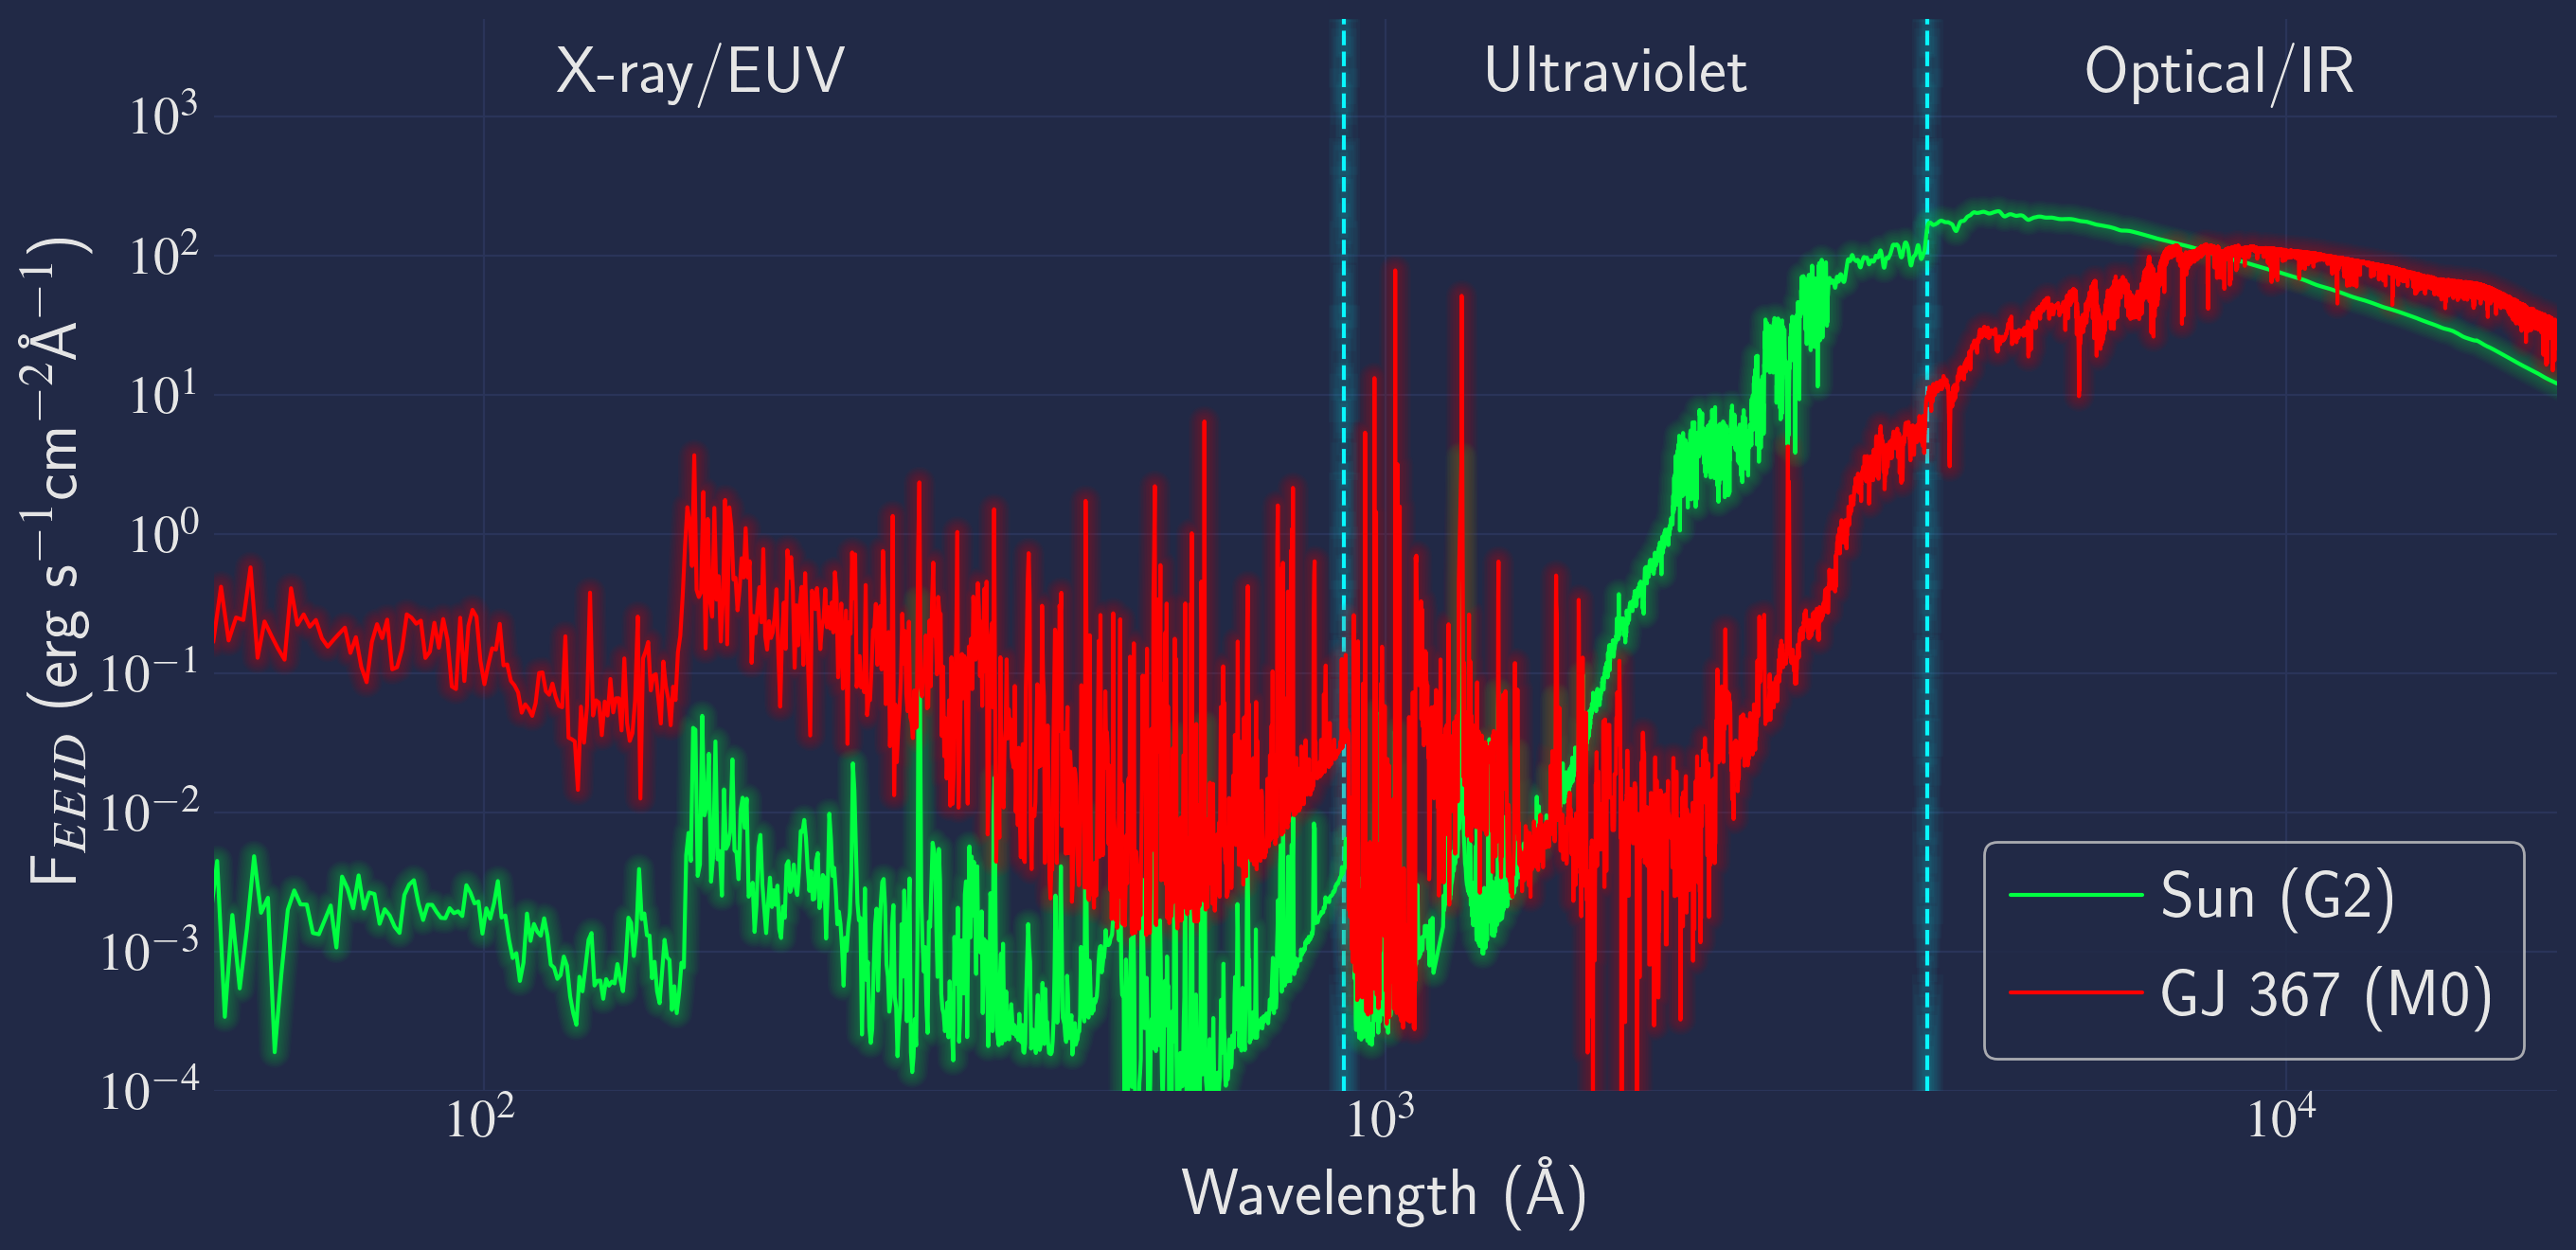

In [7]:
import mplcyberpunk
plt.style.use("cyberpunk")


d_star = 9.42*u.pc
t_star = 3522*u.K
r_star = 0.457*u.Rsun
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)

bb_scale = (u.Rsun**2 * t_sun**4)/(r_star**2 * t_star**4)*(d_star/d_sun)**2
# print(bb_scale)

plt.figure(figsize=(14, 7))


plt.plot(sw, sf, c='C3', label = 'Sun (G2)', zorder=10)
plt.plot(gjw, gjf*bb_scale, c='C4', label = 'GJ 367 (M0)', zorder=12)
plt.xlim(50.1, 20000)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 5e3)

plt.axvline(900, ls='--')
plt.axvline(4000, ls='--')


# plt.fill_between([0,900],0,10000, facecolor='b',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# plt.fill_between([900,4000],0,10000, facecolor='g', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))
# 
# plt.fill_between([4000,60000],0,10000, facecolor='r',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3
# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
plt.annotate('Optical/IR' ,(6000, label_y), size=25)

plt.legend(fontsize=25, loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()

plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.tight_layout()
# plt.savefig('plots/just_sun_cp.png', dpi=150)
plt.savefig('plots/gj367_sun_cp.png', dpi=150)

In [8]:
# kap1cet = fits.getdata('draft_hlsp/kappa1_ceti/hlsp_muscles_multi_multi_kap1cet_broadband_v1_adapt-const-res-sed.fits', 1)
# kw, kf = kap1cet['WAVELENGTH'], kap1cet['FLUX']

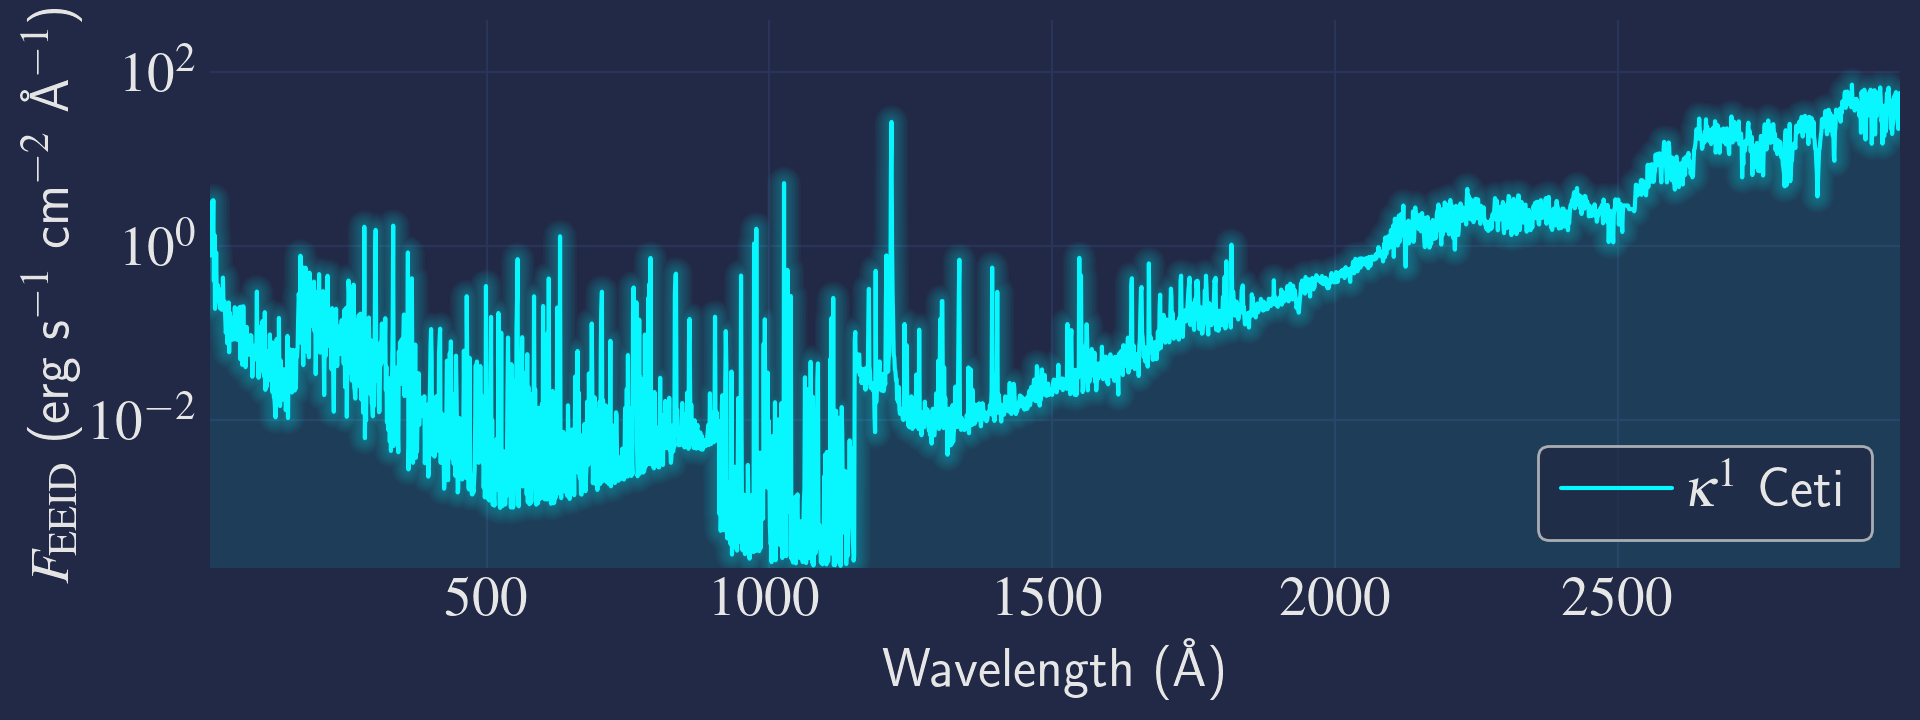

In [9]:

data = fits.getdata('/home/david/work/meats/SEDs/draft_hlsp/kappa1_ceti/hlsp_muscles_multi_multi_kap1cet_broadband_v1_adapt-const-res-sed.fits',1)
wk, fk, ek= data['WAVELENGTH'], data['FLUX'], data['ERROR']


# data = fits.getdata('/home/david/work/meats/SEDs/draft_hlsp/tau_ceti/hlsp_muscles_multi_multi_tau_ceti_broadband_v1_adapt-const-res-sed.fits',1)
# wt, ft, et= data['WAVELENGTH'], data['FLUX'], data['ERROR']



fig, ax = plt.subplots(figsize=(10, 4))



dk1c =  9.2762 *u.pc
eeidk1c = 0.926 *u.au


dtc = 3.6522 *u.pc
eeidtc = 0.711 *u.au

# solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
kscale = (dk1c.to(u.m)/eeidk1c.to(u.m))**2
tscale = (dtc.to(u.m)/eeidtc.to(u.m))**2

# ax = axes[0]

ax.plot(wk, fk*kscale, label = r'$\kappa^1$ Ceti')


ax.set_yscale('log')
# ax.set_xscale('log')
# mplcyberpunk.add_glow_effects(ax, gradient_fill=True, gradient_start='bottom')
# mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5, gradient_start='min')

ax.legend(frameon=True, loc=4)

mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow()




ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlim(12, 2999)
ax.set_ylim(2e-4, 4e2)




ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/k1c_cp.png')

# fig.savefig('plots/k1c_v_tc.pdf')
# fig.savefig('plots/k1c_v_tc.png', facecolor='w')



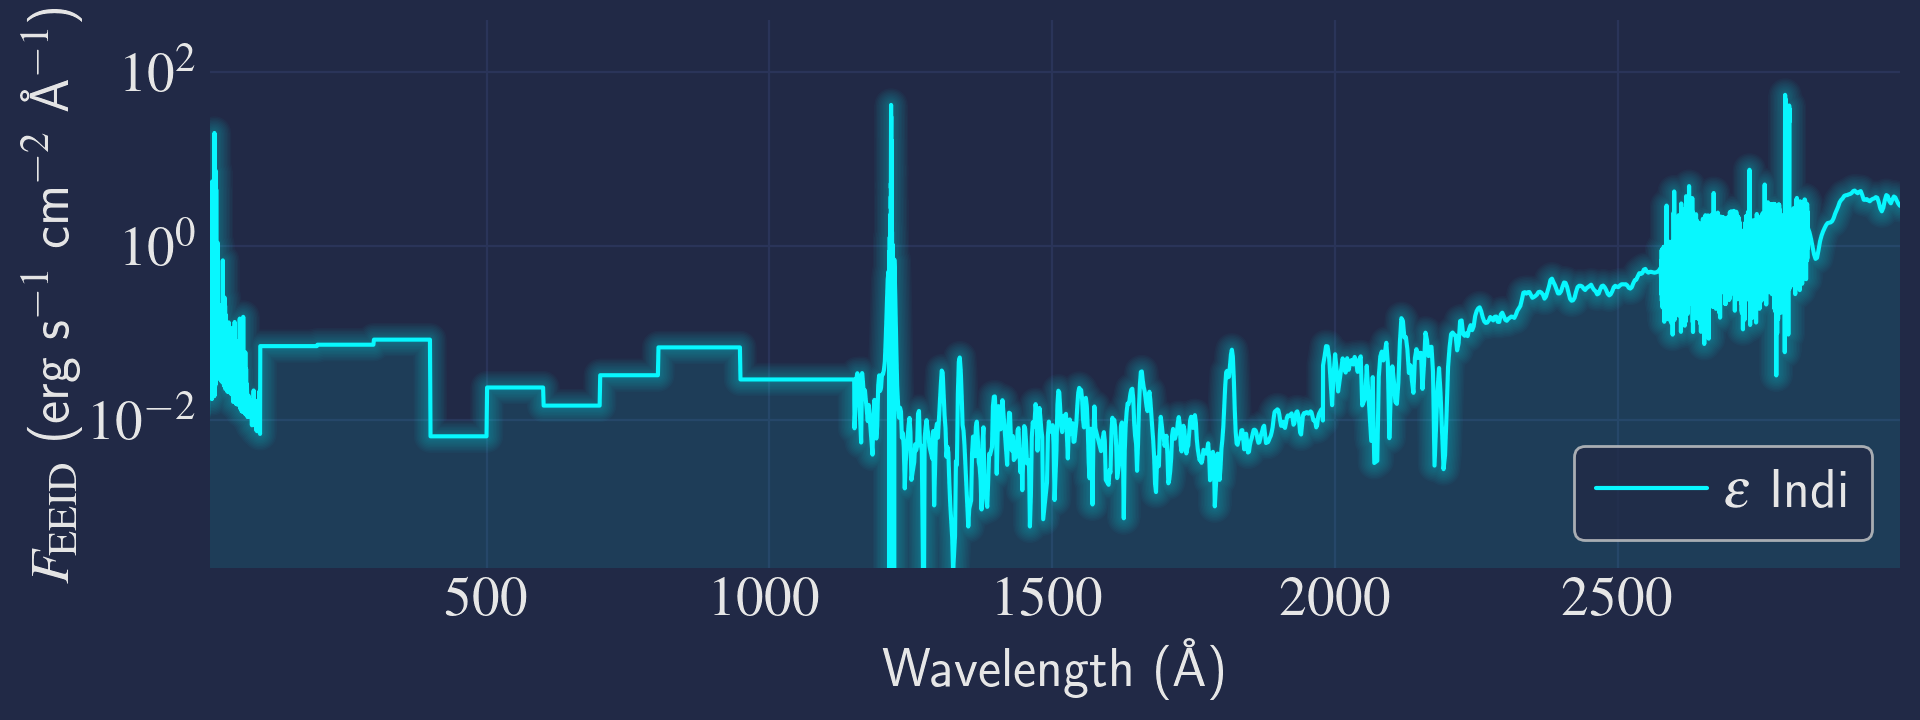

In [10]:
wi, fi = np.loadtxt('/home/david/work/hwo/seds/eps_ind_sed_v01.txt', unpack=True)


# data = fits.getdata('/home/david/work/meats/SEDs/draft_hlsp/tau_ceti/hlsp_muscles_multi_multi_tau_ceti_broadband_v1_adapt-const-res-sed.fits',1)
# wt, ft, et= data['WAVELENGTH'], data['FLUX'], data['ERROR']



fig, ax = plt.subplots(figsize=(10, 4))


dstar = 3.6*u.pc
# dsun = 1*u.au
# lstar = 10**-0.6540
eeidau = 0.471*u.au

# solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = (dstar.to(u.m)/eeidau.to(u.m))**2

# ax = axes[0]

ax.plot(wi, fi*starscale, label = r'$\epsilon$ Indi')


ax.set_yscale('log')
# ax.set_xscale('log')
# mplcyberpunk.add_glow_effects(ax, gradient_fill=True, gradient_start='bottom')
# mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5, gradient_start='min')

ax.legend(frameon=True, loc=4)

mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow()




ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
ax.set_xlim(12, 2999)
ax.set_ylim(2e-4, 4e2)




ax.set_xlabel('Wavelength (\AA)')

fig.tight_layout()

fig.savefig('plots/eps_ind_cp.png')
# fig.savefig('plots/k1c_v_tc.png', facecolor='w')



In [11]:
wi

array([4.96036017e+00, 4.96234550e+00, 4.96433243e+00, ...,
       2.49998500e+04, 2.49999000e+04, 2.49999500e+04])

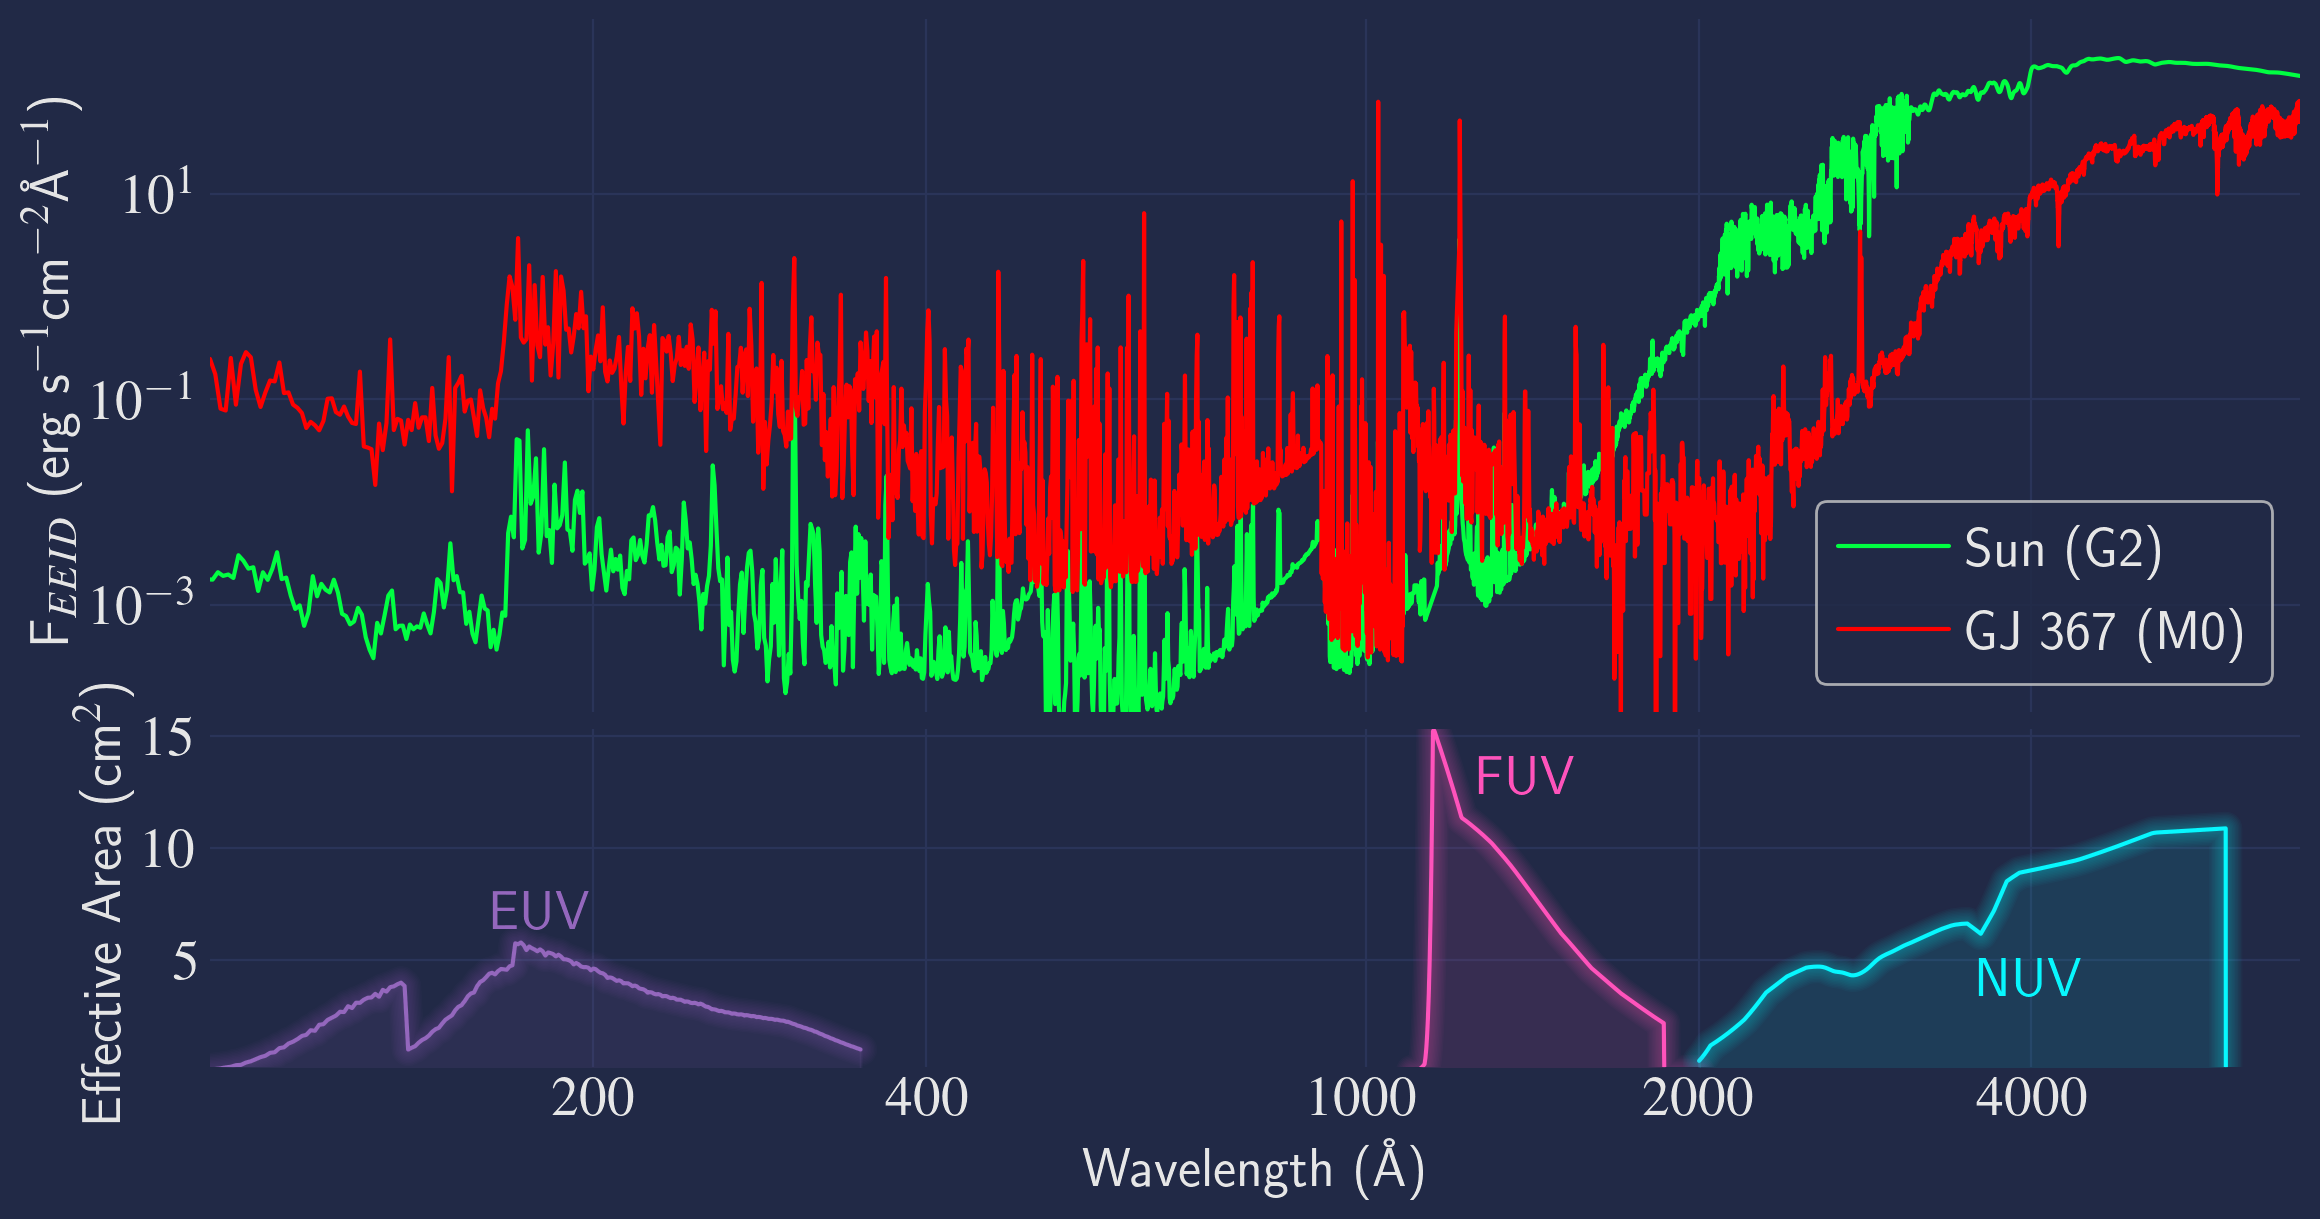

In [59]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

#adding MANTIS aeffs


d_star = 9.42*u.pc
t_star = 3522*u.K
r_star = 0.457*u.Rsun
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)

bb_scale = (u.Rsun**2 * t_sun**4)/(r_star**2 * t_star**4)*(d_star/d_sun)**2
# print(bb_scale)

# plt.figure(figsize=(14, 7))
# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1, 1,1]], figsize=(12, 6.5), sharex=True)

ax = axes[0]

ax.plot(sw, sf, c='C3', label = 'Sun (G2)', zorder=10)
ax.plot(gjw, gjf*bb_scale, c='C4', label = 'GJ 367 (M0)', zorder=12)
ax.set_xlim(90.1, 7000)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(9e-5, 5e2)


filterpath = '/home/david/work/euvcube/filters/'

# ax2 = ax.twinx()
ax2 = axes[1]
w_inst , aeff_fuv, aeff_nuv = np.loadtxt('{}MANTIS16_effective_areas_fuv_nuv.dat'.format(filterpath), unpack=True)
fmask = (w_inst > 1100) & (w_inst < 1999)

nmask = (w_inst > 2000) & (w_inst < 6999)
ax2.plot(w_inst[fmask], aeff_fuv[fmask], c='C1')
ax2.plot(w_inst[nmask], aeff_nuv[nmask], c='C0')

w_inst, aeff = np.loadtxt('{}MANTISHB16_Aeff.dat'.format(filterpath), skiprows=1, unpack=True, usecols = (0, 1))
# aeff = aeff_euv1+aeff_euv2
mask = (w_inst > 50) & (w_inst < 350)
w_inst, aeff = w_inst[mask], aeff[mask]

ax2.plot(w_inst, aeff, c='C5')
ax2.set_ylim(0.21, 15.3)

[ax2.annotate(name, (x, y), xycoords='data', color=c, ha='center', va='center')
 for name, x, y, c in zip(['EUV', 'FUV', 'NUV'], [180, 1400, 4000], [7, 13, 4],['C5', 'C1', 'C0'] )]


# ax.set_xticks([200, 400, 1000, 2000, 3000])
ax.set_xticks([200, 400, 1000, 2000, 4000])
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())

ax.legend(loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow(ax2)

ax2.set_xlabel('Wavelength (\AA)')
ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
ax2.set_ylabel ('Effective Area (cm$^2$)')

fig.tight_layout()

fig.subplots_adjust(hspace=0.05)
# plt.savefig('plots/just_sun_cp.png', dpi=150)
plt.savefig('plots/gj367_sun_cp_mantis.png', dpi=150)

In [30]:
max(aeff_fuv)

15.2496